# Case Study - Wine Quality Prediction using Decision Trees

# Agenda

1. Case study details
2. Load and explore the data
3. Build a decision tree model
4. Tune the model using hyperparamter tuning, Regularization, and pruning

# 1. Context

This datasets is related to red variants of the Portuguese "Vinho Verde" wine. Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) 
variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

These datasets can be viewed as classification or regression tasks. The classes are ordered and not balanced (e.g. there are 
much more normal wines than excellent or poor ones).

#### Dataset:

This dataset is available on the [here](https://www.kaggle.com/datasets/yasserh/wine-quality-dataset)

## Problem Statement:
    
Wine Quality Prediction- Here, we will apply a method of assessing wine quality using a decision tree, and test it against the 
wine-quality dataset from the UC Irvine Machine Learning Repository.
The wine dataset is a classic and very easy multi-class classification dataset.

### Number of Instances: red wine - 1599; white wine - 4898. 

### Attribute information:
  - Input variables (based on physicochemical tests):
      1. fixed acidity (tartaric acid - g / dm^3)
      2. volatile acidity (acetic acid - g / dm^3)
      3. citric acid (g / dm^3)
      4. residual sugar (g / dm^3)
      5. chlorides (sodium chloride - g / dm^3
      6. free sulfur dioxide (mg / dm^3)
      7. total sulfur dioxide (mg / dm^3)
      8. density (g / cm^3)
      9. pH
      10. sulphates (potassium sulphate - g / dm3)
      11. alcohol (% by volume)
  - Output variable (based on sensory data): 
      - quality (score between 0 and 10)


### Missing Attribute Values: None

### Description of attributes:

   1 - fixed acidity: most acids involved with wine or fixed or nonvolatile (do not evaporate readily)

   2 - volatile acidity: the amount of acetic acid in wine, which at too high of levels can lead to an unpleasant, vinegar taste

   3 - citric acid: found in small quantities, citric acid can add 'freshness' and flavor to wines

   4 - residual sugar: the amount of sugar remaining after fermentation stops, it's rare to find wines with less than 1 gram/liter and wines with greater than 45 grams/liter are considered sweet

   5 - chlorides: the amount of salt in the wine

   6 - free sulfur dioxide: the free form of SO2 exists in equilibrium between molecular SO2 (as a dissolved gas) and bisulfite ion; it prevents microbial growth and the oxidation of wine

   7 - total sulfur dioxide: amount of free and bound forms of S02; in low concentrations, SO2 is mostly undetectable in wine, but at free SO2 concentrations over 50 ppm, SO2 becomes evident in the nose and taste of wine

   8 - density: the density of water is close to that of water depending on the percent alcohol and sugar content

   9 - pH: describes how acidic or basic a wine is on a scale from 0 (very acidic) to 14 (very basic); most wines are between 3-4 on the pH scale

   10 - sulphates: a wine additive which can contribute to sulfur dioxide gas (S02) levels, wich acts as an antimicrobial and antioxidant

   11 - alcohol: the percent alcohol content of the wine

   Output variable (based on sensory data): 
   12 - quality (score between 0 and 10)


# 2. Load and explore data

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score, confusion_matrix
%matplotlib inline

from sklearn.feature_extraction.text import CountVectorizer  #DT does not take strings as input for the model fit step....

In [2]:
#from google.colab import drive

#drive.mount('/content/drive')

In [3]:
wine_df = pd.read_csv('C://pro10//winequality-red-1.csv',sep=';')

#### Print 10 samples from the dataset





In [4]:
wine_df.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


It is always a good practice to eye-ball raw data to get a feel of the data in terms of number of structure of the file, number 
of attributes, types of attributes and a general idea of likely challenges in the dataset.

#### Print the datatypes of each column and the shape of the dataset

In [5]:
wine_df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [6]:
wine_df.shape

(1599, 12)

#### Print the descriptive statistics of each & every column using describe() function

In [7]:
wine_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


#### Using univariate analysis check the individual attributes for their basic statistic such as central values, spread, tails etc.
What are your observations (any two attributes).

In [8]:
#plot the graphs of different variable to see the distributions.

import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:xlabel='quality', ylabel='count'>

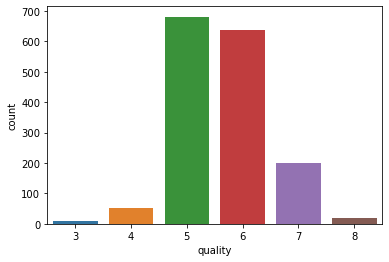

In [9]:
sns.countplot(x=wine_df['quality'])

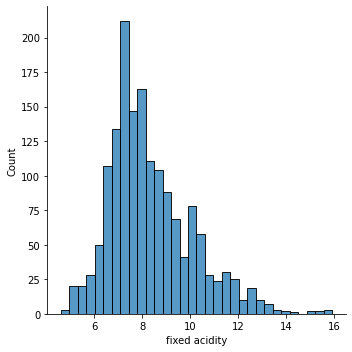

In [10]:
sns.displot(wine_df['fixed acidity'])

#### Use correlation method to observe the relationship between different variables and state your insights.
Hint: Use seaborn plot and check the relationship between different variables

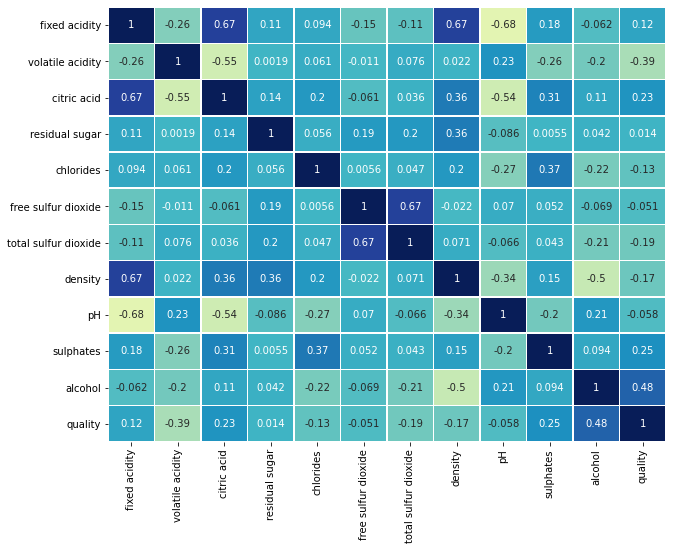

In [11]:
plt.figure(figsize=(10,8))
sns.heatmap(wine_df.corr(),
            annot=True,
            linewidths=.5,
            center=0,
            cbar=False,
            cmap="YlGnBu")
plt.show()

In [12]:
#levels of Y variable
wine_df['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [13]:
#Combine 7&8 with 6; combine 3 and 4 with 5 so that we have only 2 levels and a more balanced Y variable
wine_df['quality'] = wine_df['quality'].replace(8,6)
wine_df['quality'] = wine_df['quality'].replace(7,6)
wine_df['quality'] = wine_df['quality'].replace(3,5)
wine_df['quality'] = wine_df['quality'].replace(4,5)
wine_df['quality'].value_counts()

6    855
5    744
Name: quality, dtype: int64

#### Split the wine_df into training and test set in the ratio of 70:30 (Training:Test) based on dependent and independent variables.

In [14]:
# splitting data into training and test set for independent attributes
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test =train_test_split(wine_df.drop('quality',axis=1), wine_df['quality'], test_size=.25,
                                                   random_state=22)
X_train.shape,X_test.shape

((1199, 11), (400, 11))

# 3. Model 1 - Create the decision tree model using “entropy” method 

In [15]:
# invoking the decision tree classifier function. Using 'entropy' method of finding the split columns. Other option 
# could be gini index.  Restricting the depth of the tree to 3 and size of the leaf node to 5 (no particular reason for 
# selecting this)

model_1=DecisionTreeClassifier(criterion='gini')

In [16]:
model_1.fit(X_train, y_train)

DecisionTreeClassifier()

#### Print the accuracy of the model & print the confusion matrix

In [17]:
print(model_1.score(X_train, y_train))  # performance on train data)
print(model_1.score(X_test, y_test))  # performance on test data)

1.0
0.725


In [18]:
y_pred = model_1.predict(X_test)

In [19]:
confusion_matrix(y_pred,y_test)

array([[135,  55],
       [ 55, 155]], dtype=int64)

#### There is a high degree of overfitting in the model due to which the test accuracy drops drastically. This shows why decision trees are prone to overfitting. 

In [33]:
from sklearn.tree import export_graphviz
from six import StringIO  
from IPython.display import Image
%pip install pydotplus 
%pip install graphviz

import os

import pydotplus
import graphviz




Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [27]:
xvar = wine_df.drop('quality', axis=1)
feature_cols = xvar.columns

In [28]:
xvar

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [29]:
feature_cols = xvar.columns

In [30]:
feature_cols 

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')

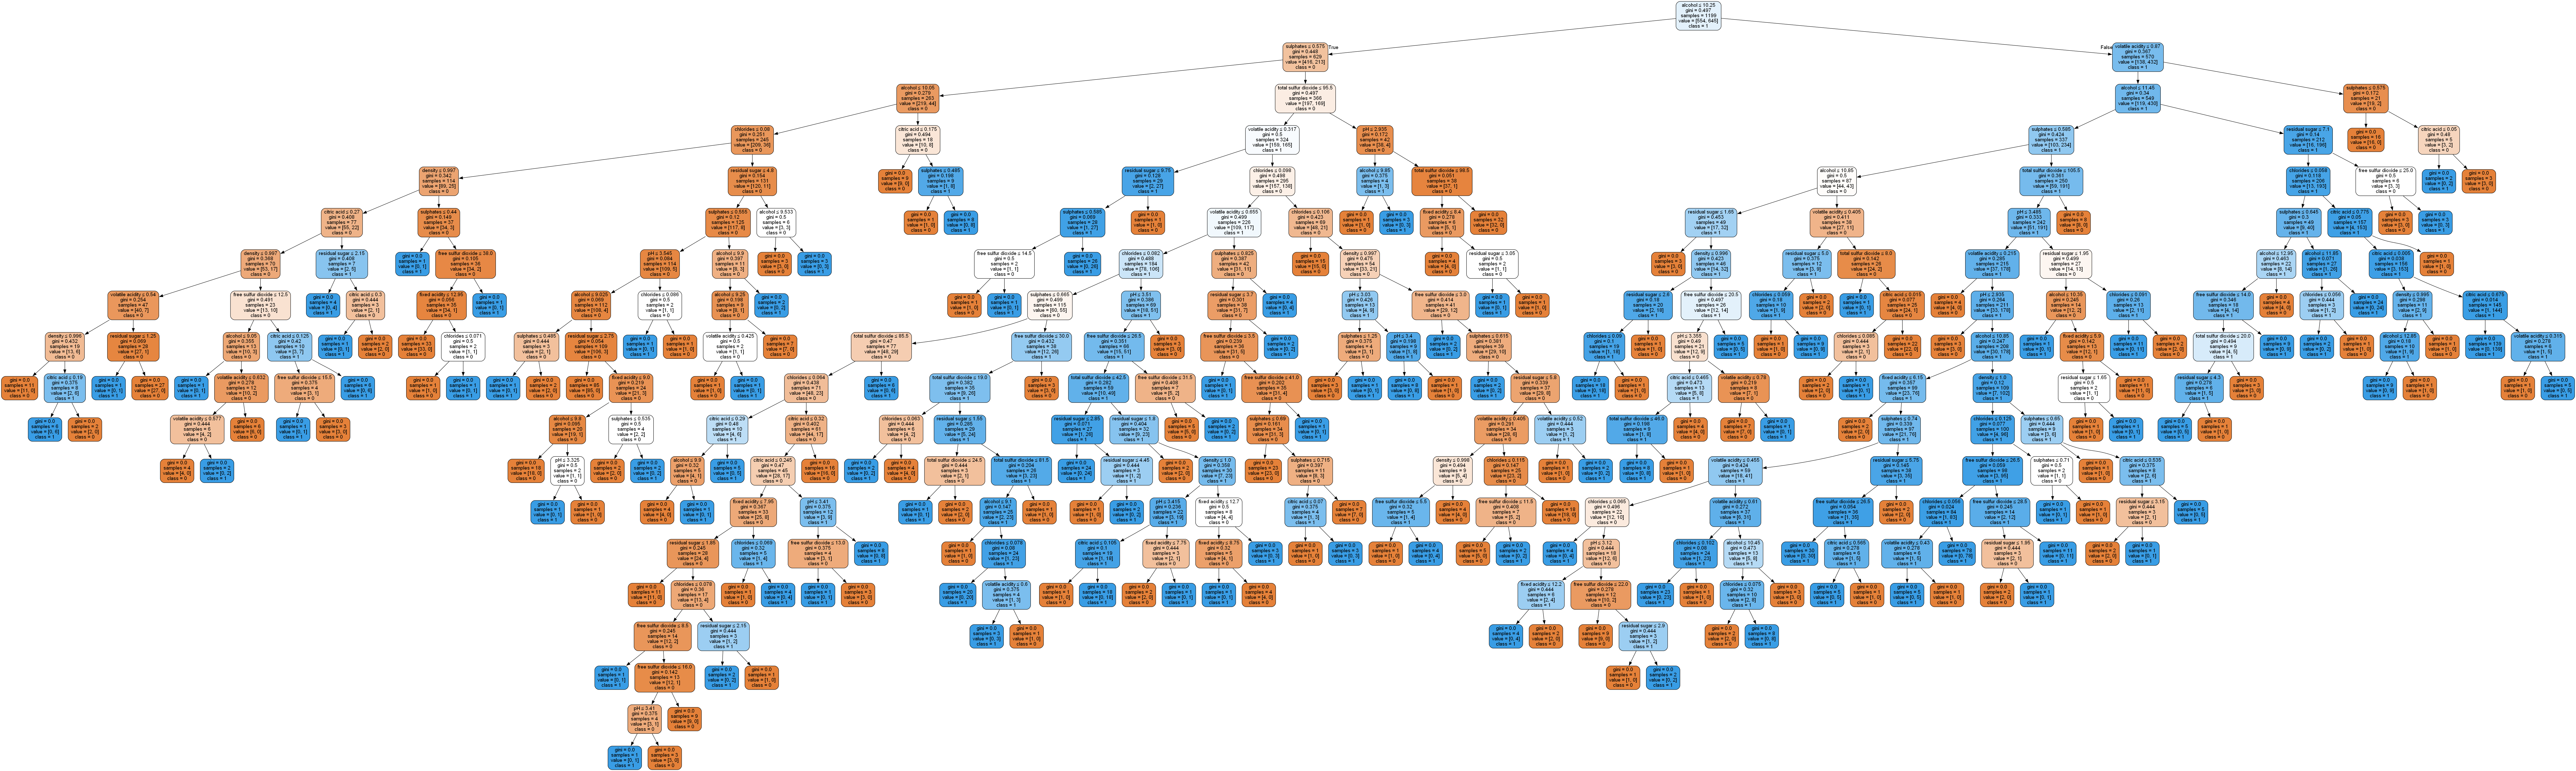

In [34]:
dot_data = StringIO()
export_graphviz(model_1, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('wines_pruned.png')
Image(graph.create_png())

# 4. Model 2 - Tune the model using hyperparamter tuning, Regularization, and pruning

#### Regularize/prune the decision tree by limiting the max. depth of trees and print the accuracy.



#### Build a decision tree using criterion = "gini", random_state = 100, max_depth=5, min_samples_split=4, max_leaf_nodes=6, min_samples_leaf=5.



In [35]:
model_2= DecisionTreeClassifier(criterion = "gini", random_state = 100, max_depth=15, max_leaf_nodes=10)
model_2.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=15, max_leaf_nodes=10, random_state=100)

In [36]:
preds_pruned = model_2.predict(X_test)
preds_pruned_train = model_2.predict(X_train)

In [37]:
print(accuracy_score(y_train,preds_pruned_train))
print(accuracy_score(y_test,preds_pruned))

0.7506255212677231
0.715


In [38]:
## Check confusion matrix classification report

print(confusion_matrix(preds_pruned,y_test))

[[161  85]
 [ 29 125]]


In [39]:
## Calculating feature importance

feat_importance = model_2.tree_.compute_feature_importances(normalize=False)
features=X_train.columns

feat_imp_dict = dict(zip(features, model_2.feature_importances_))
feat_imp = pd.DataFrame.from_dict(feat_imp_dict, orient='index')
feat_imp.sort_values(by=0, ascending=False)

,0
alcohol,0.557040
sulphates,0.168303
volatile acidity,0.142783
total sulfur dioxide,0.104904
pH,0.026971
fixed acidity,0.000000
citric acid,0.000000
residual sugar,0.000000
chlorides,0.000000
free sulfur dioxide,0.000000


From the feature importance dataframe we can infer that alcohol, sulphate, volatile acidity and total sulfur dioxide are the variables that impact wine quality

## Visualizing the tree

#### You might need to install pydotplus and graphviz packages for visualising the tree. 

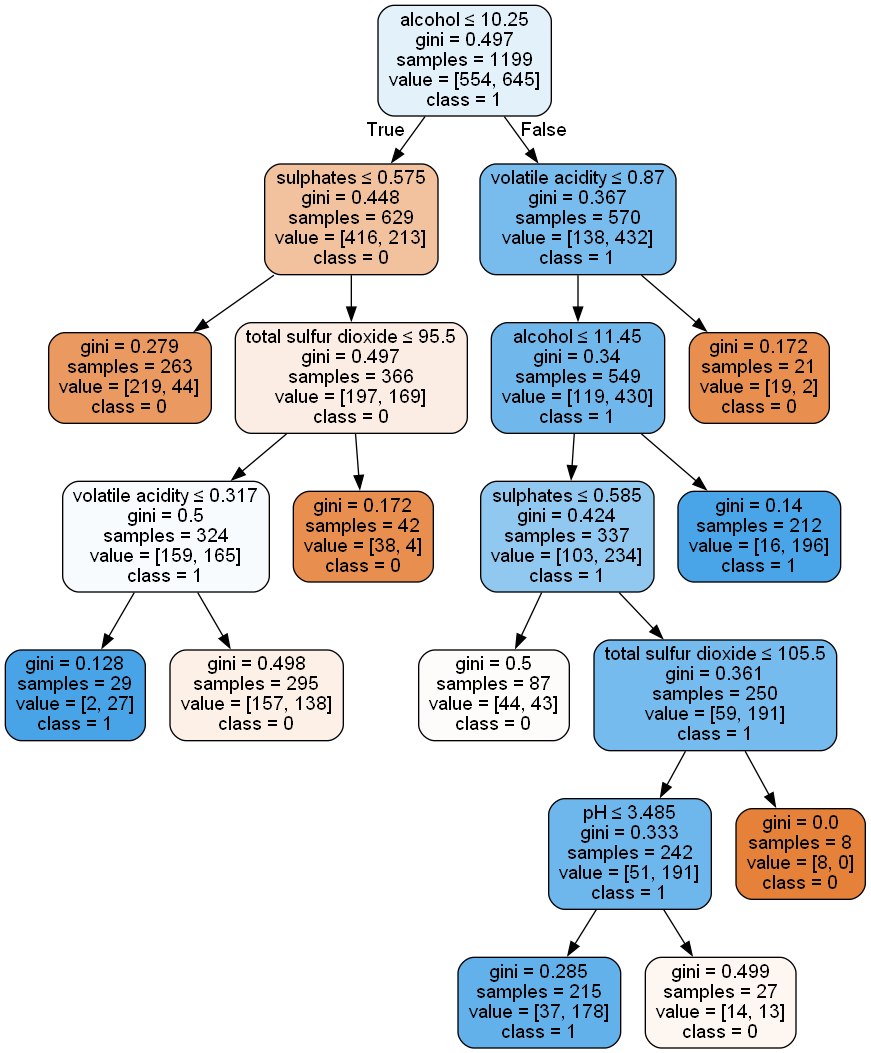

In [40]:
dot_data = StringIO()
export_graphviz(model_2, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1','2'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('wines_pruned_updated.png')
Image(graph.create_png())

#### Inference:- Model accuracy is better by using the entropy with default hyperparametrs. However that model is slightly overfit. We prune the model and chnage the hyperparameters which reduced the overfitting but over all accuracy is also reduced.

